In [74]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pd.options.display.max_columns = 100

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

In [75]:
cancer = load_breast_cancer()

In [76]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df['diagnosis'] = cancer['target']
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [77]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [78]:
cancer_df.shape

(569, 31)

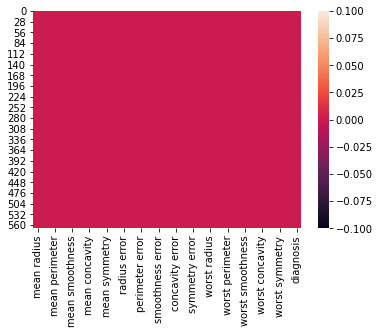

In [79]:
sns.heatmap(cancer_df.isna())

> ## Modelling

In [80]:
X = cancer_df.drop('diagnosis',axis=1)
y = cancer_df.diagnosis

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [82]:
pca = PCA(n_components = 2, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [83]:
np.sum(pca.explained_variance_ratio_[:2])

0.9980547360500415

In [84]:
X_train_pca.shape

(455, 2)

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Second component')

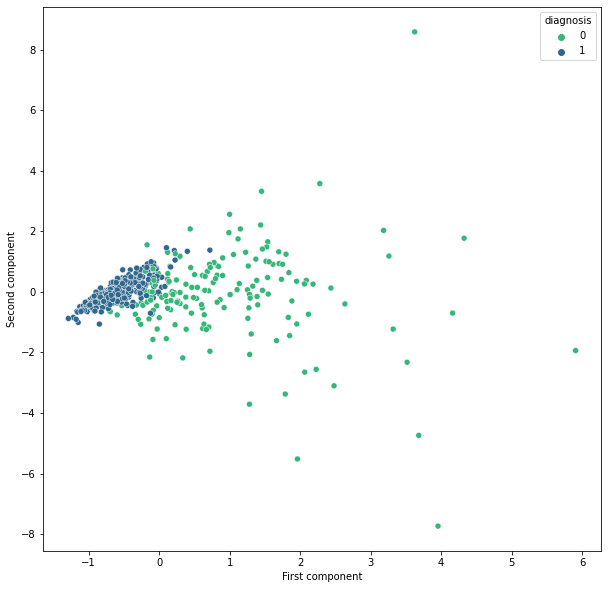

In [85]:
plt.figure(figsize=(10,10))
sns.scatterplot(X_train_pca[:,0], X_train_pca[:,1], hue=y_train, palette='viridis_r')
plt.xlabel('First component')
plt.ylabel('Second component')

In [86]:
preprocessor = ColumnTransformer([
    ('numeric',StandardScaler(), X_train.columns)
])

pipeline = Pipeline([
    ('prepoc', preprocessor),
    ('pca',PCA()),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'pca__n_components' : list(range(1,6)),
    'pca__whiten' : [True,False],
    'algo__gamma' : ['scale', 'auto'],
    'algo__C' : list(range(1,6)) 
    
}

In [87]:
SVC.get_params(SVC)

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


{'C': None,
 'break_ties': None,
 'cache_size': None,
 'class_weight': None,
 'coef0': None,
 'decision_function_shape': None,
 'degree': None,
 'gamma': None,
 'kernel': None,
 'max_iter': None,
 'probability': None,
 'random_state': None,
 'shrinking': None,
 'tol': None,
 'verbose': None}

In [88]:
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=3, verbose=1)
model.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done 290 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    1.4s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prepoc',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothn...
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object'))])),
                                       ('pca', PCA()),
                                       ('algo', SVC(max_iter=500))]),
             n_j

In [89]:
print(model.best_params_)
print(model.score(X_train,y_train),  model.score(X_test,y_test))
      

{'algo__C': 4, 'algo__gamma': 'scale', 'pca__n_components': 5, 'pca__whiten': True}
0.9824175824175824 0.956140350877193
